In [1]:
import os
import json
from dataclasses import asdict
from dotenv import load_dotenv
from openai import OpenAI
from IPython.display import Image
from protocol import Env,Message
from agents import Group
from agent import Agent

 
[2024-12-11 17:36:24][INFO]: All agents are fully connected
 
[2024-12-11 17:36:24][INFO]: Create a default manager for the group


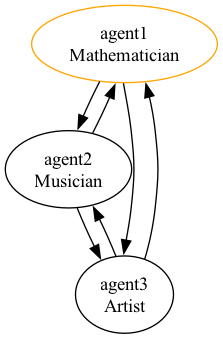

In [2]:
# load the environment variables
load_dotenv()
# create a model client
model_client = OpenAI()
# create an environment
env = Env(
    description="This is a test environment",
    members=[
        Agent(name="agent1", 
              role="Mathematician", 
              description="Transfer to me if you need help with math.", 
              dify_access_token=os.environ.get("AGENT1_ACCESS_TOKEN"),
              verbose=True),

        Agent(name="agent2", 
              role="Musician", 
              description="Transfer to me if you need help with music.", 
              dify_access_token=os.environ.get("AGENT2_ACCESS_TOKEN"),
              verbose=True),

        Agent(name="agent3", 
              role="Artist", 
              description="Transfer to me if you need help with art.",
              model_client=model_client,
              verbose=True),
    ]
)
# create a group of agents
g = Group(env=env,model_client=model_client,verbose=True,manager=True)

Image(g.draw_relations())

In [3]:
g.update_group_messages([Message(sender="user", action="talk", result="Can anyone help me with math? 2+2=?"),
                         Message(sender="agent1", action="solve", result="2+2=4"),
                         Message(sender="user", action="talk", result="Can anyone help me with music?")
                        ])

In [4]:
# Do handoff
# After handoff the current agent will be updated to the one who will speak next
next_agent = g.handoff(next_speaker_select_mode="auto2",include_current=True,model="gpt-4o-mini")

# Print the group message protocol instance
print('-'*50)
print("Below Is The Group Message Protocol Instance")
print('-'*50)
print(json.dumps(asdict(g.group_messages), indent=4))
# print('-'*50)
# print("Below Message Send To `{}` who is {}".format(g.current_agent,g.members_map[g.current_agent].role))
# print('-'*50)
# print(g._build_send_message(g.group_messages,cut_off=3,send_to=g.current_agent))

 
[2024-12-11 17:36:32][INFO]: handoff from agent1 to agent2 by using auto2 mode
--------------------------------------------------
Below Is The Group Message Protocol Instance
--------------------------------------------------
{
    "group_id": "a2e89619-3ce3-449f-84eb-ee754f85a5bd",
    "env": {
        "description": "This is a test environment",
        "members": [
            {
                "name": "agent1",
                "role": "Mathematician",
                "description": "Transfer to me if you need help with math."
            },
            {
                "name": "agent2",
                "role": "Musician",
                "description": "Transfer to me if you need help with music."
            },
            {
                "name": "agent3",
                "role": "Artist",
                "description": "Transfer to me if you need help with art."
            }
        ],
        "relationships": {
            "agent1": [
                "agent2",
            

In [5]:
g.user_input("How about music for reading?")
_ = g.call_agent(next_speaker_select_mode="auto2",include_current=True,model="gpt-4o-mini")

 
[2024-12-11 17:36:57][INFO]: User input (talk): How about music for reading?
 
[2024-12-11 17:36:58][INFO]: Calling Dify agent [agent2]
 
[2024-12-11 17:37:02][INFO]: Agent agent2 response: If you're looking for music that complements reading, I can suggest a few genres and specific types of music that create a conducive atmosphere for concentration and immersion in literature.

1. **Classical Music**: This genre is renowned for its ability to enhance focus. Composers like Johann Sebastian Bach, Wolfgang Amadeus Mozart, and Claude Debussy have created pieces that are both calming and intellectually stimulating. For instance, Bach's "Goldberg Variations" or Debussy's "Clair de Lune" can provide a serene backdrop while you read.

2. **Ambient Music**: This genre is specifically designed to create an atmospheric soundscape. Artists like Brian Eno and Max Richter produce music that is often instrumental and relaxing, which can help you stay focused without distracting lyrics. Consider En

In [6]:
g.user_input("Let's discuss what is beauty.")
_ = g.call_agent(next_speaker_select_mode="auto2",include_current=False,model="gpt-4o-mini")
_ = g.call_agent(next_speaker_select_mode="auto2",include_current=False,model="gpt-4o-mini")
_ = g.call_agent(next_speaker_select_mode="auto2",include_current=False,model="gpt-4o-mini")
_ = g.call_agent(agent="agent1",model="gpt-4o-mini")

 
[2024-12-11 17:37:02][INFO]: User input (talk): Let's discuss what is beauty.
 
[2024-12-11 17:37:03][INFO]: handoff from agent2 to agent3 by using auto2 mode
 
[2024-12-11 17:37:04][INFO]: Calling OpenAI agent [agent3]
 
[2024-12-11 17:37:08][INFO]: Agent agent3 response: Beauty is a complex and subjective concept that varies widely from person to person and culture to culture. As an artist, I often perceive beauty as an interplay of elements that evoke an emotional response. Here are a few thoughts on what beauty can encompass:

1. **Aesthetic Experience**: Beauty is frequently linked to visual appeal—colors, shapes, and forms that please the eye. This could be found in nature, art, or even architecture. The harmony and balance of these elements can create a sense of beauty that resonates deeply.

2. **Emotional Resonance**: Beauty can also stem from the emotional connections we have with certain works of art, music, or experiences. A painting that speaks to your soul, a piece of m

In [7]:
g.user_input("Can you summarize the discussion?")
_ = g.call_manager(model="gpt-4o-mini",message_cut_off=5)

 
[2024-12-11 17:37:41][INFO]: User input (talk): Can you summarize the discussion?
 
[2024-12-11 17:37:41][INFO]: Calling OpenAI agent [GroupManager-a2e89619-3ce3-449f-84eb-ee754f85a5bd]
 
[2024-12-11 17:37:45][INFO]: Call manager GroupManager-a2e89619-3ce3-449f-84eb-ee754f85a5bd
 
[2024-12-11 17:37:45][INFO]: Manager GroupManager-a2e89619-3ce3-449f-84eb-ee754f85a5bd response: Certainly! The discussion revolves around the concept of beauty as perceived through the lenses of art, mathematics, and music by the group members:

1. **Agent3 (Artist)**: Discussed beauty as a complex and subjective experience influenced by aesthetic elements, emotional resonance, cultural context, imperfection, and transience. Beauty is seen as an interplay of perceptions and feelings that can vary greatly across cultures and personal experiences.

2. **Agent1 (Mathematician)**: Explored beauty in mathematics through elegance, simplicity, patterns, interconnectedness, problem-solving, and abstraction. Mathem

In [13]:
_ = g.talk("Can explain the concept of complex numbers?")

 
[2024-12-11 17:40:08][INFO]: User input (talk): Can explain the concept of complex numbers?
 
[2024-12-11 17:40:08][INFO]: Calling Dify agent [agent1]
 
[2024-12-11 17:40:17][INFO]: Agent agent1 response: Complex numbers are an extension of the real number system that include both a real part and an imaginary part. They are typically expressed in the form:

\[ z = a + bi \]

where:
- \( z \) is the complex number,
- \( a \) is the real part,
- \( b \) is the imaginary part,
- \( i \) is the imaginary unit, defined by the property \( i^2 = -1 \).

### Key Aspects of Complex Numbers:

1. **Real and Imaginary Parts**: In \( z = a + bi \), \( a \) is the real part and \( b \) is the imaginary part. For instance, in \( 3 + 4i \), \( 3 \) is the real part, and \( 4 \) is the imaginary part.

2. **Complex Plane**: Complex numbers can be visualized on the complex plane, where the x-axis represents the real part and the y-axis represents the imaginary part. For example, the complex number \( 

In [14]:
_ = g.talk("I want to learn some instruments.")

 
[2024-12-11 17:40:17][INFO]: User input (talk): I want to learn some instruments.
 
[2024-12-11 17:40:18][INFO]: handoff from agent1 to agent2 by using auto2 mode
 
[2024-12-11 17:40:19][INFO]: Calling Dify agent [agent2]
 
[2024-12-11 17:40:25][INFO]: Agent agent2 response: That's great to hear that you want to learn some instruments! Learning to play an instrument can be a rewarding and fulfilling experience. Here are a few steps and tips to get you started:

1. **Choose an Instrument**: Think about what type of music you enjoy and what instrument resonates with you. Some popular choices include:
   - **Piano**: Great for beginners and versatile for various music styles.
   - **Guitar**: Popular and portable, suitable for many genres, from rock to folk.
   - **Violin**: Offers a classical music foundation and is also used in various genres.
   - **Drums**: Perfect if you enjoy rhythm and want to play in a band.

2. **Set Goals**: Determine what you want to achieve with your instrum

## Add and Delete Member Dynamicly 

Like people come and go in some place or some group

 
[2024-12-11 17:21:36][INFO]: Self-defined relationships


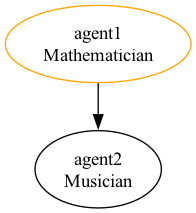

In [16]:
# load the environment variables
load_dotenv()
# create a model client
model_client = OpenAI()
# create an environment
env = Env(
    description="This is a test environment",
    members=[
        Agent(name="agent1", 
              role="Mathematician",
              description="Transfer to me if you need help with math.", 
              dify_access_token=os.environ.get("AGENT1_ACCESS_TOKEN")),
              
        Agent(name="agent2", 
              role="Musician", 
              description="Transfer to me if you need help with music.", 
              dify_access_token=os.environ.get("AGENT2_ACCESS_TOKEN"))
    ],
    relationships={"agent1": ["agent2"]}
)
# create a group of agents
g = Group(env=env,model_client=model_client,verbose=True)

Image(g.draw_relations())

 
[2024-12-11 17:21:36][INFO]: Self-defined relationships
 
[2024-12-11 17:21:36][INFO]: Succesfully add member agent3
 
[2024-12-11 17:21:36][INFO]: Self-defined relationships
 
[2024-12-11 17:21:36][INFO]: Succesfully add member agent4


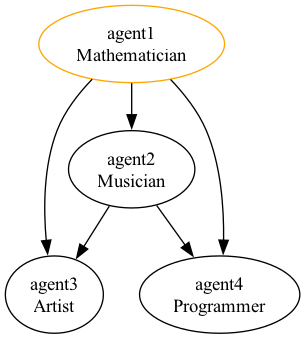

In [17]:
g.add_member(
    member=Agent(
        name="agent3", 
        role="Artist",
        description="Transfer to me if you need help with art.", 
        dify_access_token=os.environ.get("AGENT3_ACCESS_TOKEN")
    ),
    relation=[("agent1", "agent3"), ("agent2", "agent3")]
)

g.add_member(
    member = Agent(
        name="agent4", 
        role="Programmer",
        description="Transfer to me if you need help with programming.", 
        model_client=model_client
    ),
    relation=[("agent1", "agent4"), ("agent2", "agent4")]
)

Image(g.draw_relations())

 
[2024-12-11 17:21:37][INFO]: Self-defined relationships
 
[2024-12-11 17:21:37][INFO]: Successfully delete member agent2


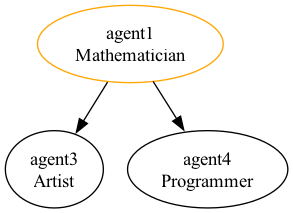

In [18]:
g.delete_member("agent2")
Image(g.draw_relations())

 
[2024-12-11 17:21:37][INFO]: User input (talk): can you recommend me a art work?
 
[2024-12-11 17:21:38][INFO]: handoff from agent1 to agent3 by using auto2 mode


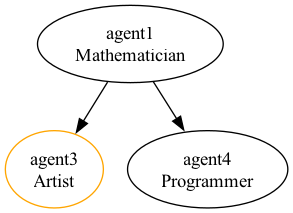

In [19]:

g.user_input("can you recommend me a art work?")
next_agent = g.handoff(next_speaker_select_mode="auto2",include_current=True,model="gpt-4o-mini")
Image(g.draw_relations())

 
[2024-12-11 17:21:39][INFO]: Self-defined relationships
 
[2024-12-11 17:21:39][INFO]: Succesfully add member agent5


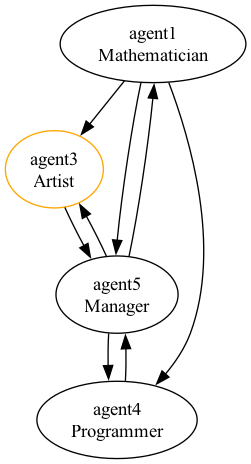

In [20]:
g.add_member(
        member = Agent(
            name="agent5",
            role="Manager",
            description="Transfer to me if you don't know who to transfer to.", 
            model_client=model_client
            ),
        relation = [("agent3","agent5"),("agent5","agent1"),("agent5","agent3"),("agent5","agent4"),("agent4","agent5"),("agent1","agent5")]
    )
Image(g.draw_relations())

 
[2024-12-11 17:21:41][INFO]: User input (talk): can you help me with math?
 
[2024-12-11 17:21:42][INFO]: handoff from agent3 to agent5 by using auto2 mode
 
[2024-12-11 17:21:46][INFO]: handoff from agent5 to agent1 by using auto2 mode


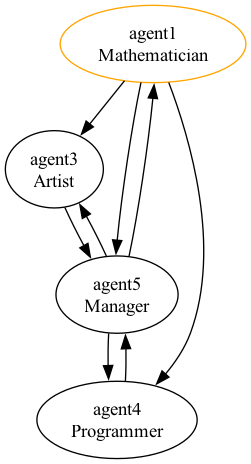

In [21]:

g.user_input("can you help me with math?")
next_agent = g.handoff(next_speaker_select_mode="auto2",include_current=True,model="gpt-4o-mini")
Image(g.draw_relations())

## Task

In [11]:
# load the environment variables
load_dotenv()
# create a model client
model_client = OpenAI()
# tools
def get_current_mood():
    """Get the mood of user."""
    return "Current mood is happy."

def get_current_time():
    """Get the current time."""
    return "It is 12:00 PM now."

def get_weather():
    """ Get the weather."""
    return "It is sunny today."

# create an environment
env = Env(
    description="This is a test environment",
    members=[
        Agent(name = "agent1",
              role = "Personal Assistant", 
              description = "Transfer to me if you need help with personal stuff.",
              model_client = model_client,
              tools = [get_current_mood,get_current_time,get_weather],
              verbose = True),

        Agent(name="agent2", 
              role="Musician", 
              description="Transfer to me if you need help with music.", 
              dify_access_token=os.environ.get("AGENT2_ACCESS_TOKEN"),
              verbose=True)
    ]
)
# create a group of agents
g = Group(env=env,model_client=model_client,verbose=True,manager=True)

 
[2024-12-11 18:06:11][INFO]: All agents are fully connected
 
[2024-12-11 18:06:11][INFO]: Create a default manager for the group


In [12]:
task = "What type of music would be suitable for the current weather and my mood today, keeping in mind that I enjoy pop music?"
_ = g.task(task,model="gpt-4o-mini",strategy="sequential")

 
[2024-12-11 18:06:14][INFO]: User input (task): What type of music would be suitable for the current weather and my mood today, keeping in mind that I enjoy pop music?
 
[2024-12-11 18:06:14][INFO]: Start task: What type of music would be suitable for the current weather and my mood today, keeping in mind that I enjoy pop music?
 
[2024-12-11 18:06:14][INFO]: ===> Step 1 for agent1
 
[2024-12-11 18:06:14][INFO]: manually set the current agent to agent1
 
[2024-12-11 18:06:14][INFO]: Calling OpenAI agent [agent1]
 
[2024-12-11 18:06:17][INFO]: Agent agent1 response: By using the tool 'get_weather' with the arguments {}, the result is 'It is sunny today.'.
 
[2024-12-11 18:06:17][INFO]: Agent agent1 response: By using the tool 'get_current_mood' with the arguments {}, the result is 'Current mood is happy.'.
 
[2024-12-11 18:06:17][INFO]: Agent agent1 response: Given that it's sunny today and your current mood is happy, I suggest listening to some upbeat pop music. Here are a few recomm

In [13]:
task = "What type of music would be suitable for the current weather and my mood today, keeping in mind that I enjoy pop music?"
_ = g.task(task,model="gpt-4o-mini",strategy="auto")

 
[2024-12-11 18:06:29][INFO]: Start task: What type of music would be suitable for the current weather and my mood today, keeping in mind that I enjoy pop music?
 
[2024-12-11 18:06:29][INFO]: [Sub-Task] input (task): Use get_weather tool to determine the current weather conditions.
 
[2024-12-11 18:06:29][INFO]: ===> Step 1 for agent1
 
[2024-12-11 18:06:29][INFO]: manually set the current agent to agent1
 
[2024-12-11 18:06:29][INFO]: Calling OpenAI agent [agent1]
 
[2024-12-11 18:06:30][INFO]: Agent agent1 response: By using the tool 'get_weather' with the arguments {}, the result is 'It is sunny today.'.
 
[2024-12-11 18:06:30][INFO]: Agent agent1 response: The current weather conditions are sunny today. If you need assistance with anything else, feel free to ask!
 
[2024-12-11 18:06:30][INFO]: [Sub-Task] input (task): Use get_current_mood tool to assess your current mood.
 
[2024-12-11 18:06:30][INFO]: ===> Step 2 for agent1
 
[2024-12-11 18:06:30][INFO]: manually set the current

 
[2024-12-11 18:16:41][INFO]: All agents are fully connected


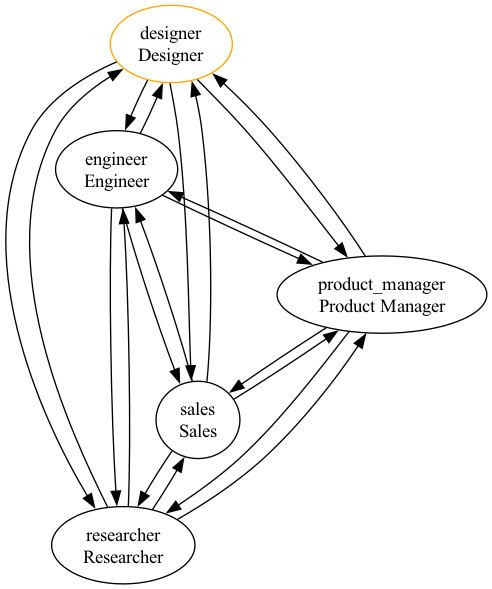

In [28]:
# create an environment
env = Env(
    description="This is a test environment",
    members=[
        Agent(name = "designer",
              role = "Designer", 
              description = "Transfer to me if you need help with design.",
              model_client = model_client,
              verbose = True),

        Agent(name="engineer",
              role="Engineer",
              description="Transfer to me if you need help with engineering.",
              model_client=model_client,                
              verbose=True),

        Agent(name="researcher",
                role="Researcher",
                description="Transfer to me if you need help with research.",
                model_client=model_client,
                verbose=True),

        Agent(name="sales",
                role="Sales",
                description="Transfer to me if you need help with sales.",
                model_client=model_client,
                verbose=True),

      Agent(name="product_manager",
                  role="Product Manager",
                  description="Transfer to me if you need help with product management.",
                  model_client=model_client,
                  verbose=True),
    ]
)
# create a group of agents
g = Group(env=env,model_client=model_client,verbose=True)
Image(g.draw_relations())

In [29]:
_ = g.task("I want to build a simplistic and user-friendly bicycle help write a design brief.",model="gpt-4o-mini",strategy="auto")

 
[2024-12-11 18:16:45][INFO]: Start task: I want to build a simplistic and user-friendly bicycle help write a design brief.
 
[2024-12-11 18:16:45][INFO]: [Sub-Task] input (task): Conduct market research to understand user needs and preferences for a simple bicycle.
 
[2024-12-11 18:16:45][INFO]: ===> Step 1 for researcher
 
[2024-12-11 18:16:45][INFO]: manually set the current agent to researcher
 
[2024-12-11 18:16:45][INFO]: Calling OpenAI agent [researcher]
 
[2024-12-11 18:16:53][INFO]: Agent researcher response: To conduct market research on user needs and preferences for a simple bicycle, I will follow a structured approach:

1. **Define Objectives**:
   - Understand the target demographic for simple bicycles (age, gender, lifestyle).
   - Identify key features and specifications that users look for in a simple bicycle.
   - Assess price sensitivity and preferred purchasing channels.
   - Gather insights on customer experience and potential pain points.

2. **Methodology**:
   